In [152]:
import numpy as np
from numpy import pi, sin, cos

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import Delaunay
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [183]:
size = 200

points = np.random.uniform(-50, 50, (3, size))
points[2,:] = np.random.uniform(10, 11, size) + 5*sin(0.1*points[0,:] + 0.1*points[1,:])

/tmp/ipykernel_337315/2737304414.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


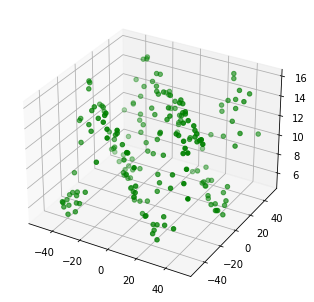

In [184]:
fig = plt.figure()
ax = Axes3D(fig)

plot = ax.scatter(points[0,:], points[1,:], points[2,:], color='green')

In [185]:
hull = ConvexHull(points[0:2,:].T)

tri = Delaunay(points[0:2,:].T)

hull_indices = hull.simplices.flatten()

hull_indices = list(dict.fromkeys(hull_indices))

print(hull_indices)

base_tri = Delaunay(points[0:2,hull_indices].T)

print(base_tri.simplices)

[140, 119, 67, 138, 193, 103, 133, 51, 48, 171, 110, 111, 74, 125, 159]
[[ 0  6  2]
 [ 6  0  1]
 [10  4  7]
 [ 6  4  2]
 [ 4  6  7]
 [ 9  4 10]
 [ 4  9  5]
 [ 4  3  2]
 [ 8 10  7]
 [ 8 11 10]
 [13 11  8]
 [11 14 12]
 [13 14 11]]


/tmp/ipykernel_337315/2010924951.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


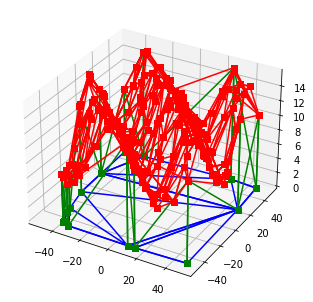

In [186]:
fig = plt.figure()
ax = Axes3D(fig)

for simplex in hull.simplices:
    ax.plot3D(points[0, simplex], points[1, simplex], 'bs-') 
    
for simplex in base_tri.simplices:
    ax.plot3D(points[:,hull_indices][0, simplex], points[:,hull_indices][1, simplex], 0, 'bs-')
    
for simplex in hull.simplices:
    ax.plot3D([points[0, simplex[0]], points[0, simplex[0]]], [points[1, simplex[0]], points[1, simplex[0]]], [0, points[2, simplex[0]]], 'gs-')
    ax.plot3D([points[0, simplex[1]], points[0, simplex[1]]], [points[1, simplex[1]], points[1, simplex[1]]], [0, points[2, simplex[1]]], 'gs-')
    ax.plot3D([points[0, simplex[0]], points[0, simplex[1]]], [points[1, simplex[0]], points[1, simplex[1]]], [0, points[2, simplex[1]]], 'gs-')

for simplex in tri.simplices:
    ax.plot3D(points[0, simplex], points[1, simplex], points[2, simplex], 'rs-')

[]

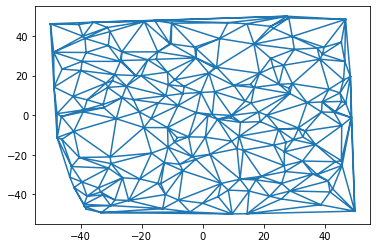

In [187]:
fig = plt.figure()

plt.triplot(points[0,:], points[1,:], tri.simplices.copy())

plt.plot()

In [188]:
outPoints = []
outTriangles = []

# Add original Points
for i in range(size):
    
    outPoints.append(points[:,i])
        
# Add hull points mapped to xy plane
for index in hull_indices:

    outPoints.append(points[:,index].copy())
    outPoints[-1][2] = 0.0
    
# Add triangles for the top part
for simplex in tri.simplices:
    
    outTriangles.append(simplex)
    
# Add triangles for the bottom
for simplex in base_tri.simplices:
    
    outTriangles.append([simplex[0] + size, simplex[1] + size, simplex[2] + size])
    
# Add triangles for the sides
for simplex in hull.simplices:
    
    bottomindex1 = hull_indices.index(simplex[0])
    bottomindex2 = hull_indices.index(simplex[1])
    
    outTriangles.append([simplex[0], simplex[1], bottomindex2 + size])
    outTriangles.append([simplex[0], bottomindex2 + size, bottomindex1 + size])
    
    pass
    
print("{} vertices and {} faces".format(len(outPoints), len(outTriangles)))

215 vertices and 426 faces


/tmp/ipykernel_337315/4218498251.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


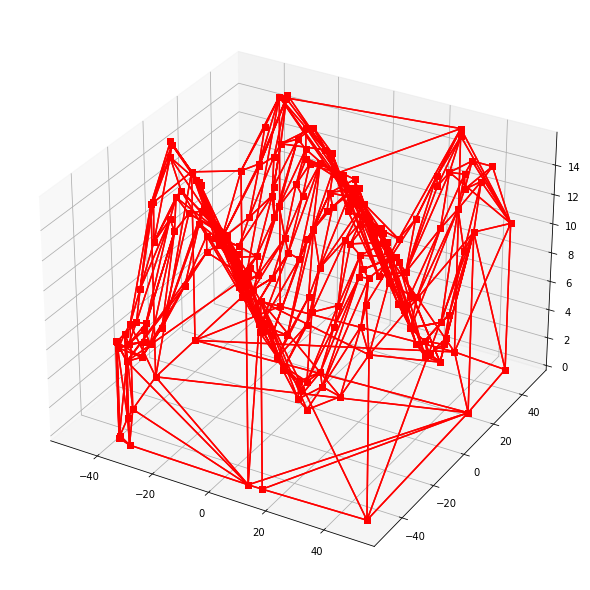

In [189]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

for simplex in outTriangles:
    xs = [outPoints[simplex[0]][0], outPoints[simplex[1]][0], outPoints[simplex[2]][0], outPoints[simplex[0]][0]]
    ys = [outPoints[simplex[0]][1], outPoints[simplex[1]][1], outPoints[simplex[2]][1], outPoints[simplex[0]][1]]
    zs = [outPoints[simplex[0]][2], outPoints[simplex[1]][2], outPoints[simplex[2]][2], outPoints[simplex[0]][2]]
    
    ax.plot3D(xs, ys, zs, 'rs-')

In [190]:
# Add original Points
for i in range(size):
    
    print("v {} {} {}".format(points[0,i],points[1,i],points[2,i]))
    
# Add hull points mapped to xy plane
for index in hull_indices:
    print("v {} {} {}".format(points[0,index], points[1,index], 0.0))
    
print("\n\n\n")
    
    
    
for simplex in tri.simplices:
    
    print("f {} {} {}".format(simplex[0] + 1, simplex[1] + 1, simplex[2] + 1))
    
for simplex in base_tri.simplices:
    
    print("f {} {} {}".format(simplex[0] + size + 1, simplex[1] + size + 1, simplex[2] + size + 1))
    
for simplex in hull.simplices:
    
    bottomindex1 = hull_indices.index(simplex[0])
    bottomindex2 = hull_indices.index(simplex[1])
    
    print("f {} {} {}".format(simplex[0] + 1, simplex[1] + 1, bottomindex2 + size + 1))
    print("f {} {} {}".format(simplex[0] + 1, bottomindex2 + size + 1, bottomindex1 + size + 1))

v 36.86700657878622 -14.840591826288815 14.367785941284767
v -13.166161519306222 -47.23347602964496 11.833039448065534
v -30.198884678307092 -45.67495056850396 5.9229236880460565
v -11.402807062820962 -16.155468719918296 8.330124372854415
v -19.192889078005503 47.292629083053725 12.072495824354906
v -28.360260267178393 -1.808506516521959 10.22265749931167
v 17.42429429709776 -32.71458871805606 5.762571964516172
v 3.8594596780778687 11.830845699390558 15.032664624451094
v -32.65315303330792 5.408135557515962 8.737123787070763
v 11.19183178627712 -16.920009910178855 7.670625324967082
v 1.627681111949073 -0.23702959172516813 11.34483220930255
v 26.59994456577202 -25.519157042589402 10.668589619438212
v -39.54037143084584 27.180509263116747 6.054301938915495
v -2.143017385805713 1.2748906986652457 9.625340530447009
v -38.91010600766967 -45.11158788979319 5.990165236586652
v 3.777757620091549 23.94655523160445 12.209328965487467
v 15.774152689873006 6.136784145498019 14.158335530764756
v 0.